# Intro to Data Visualization with Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Folder path
path = r'C:\Users\Lucero\Documents\Instacart Basket Analysis\02 Data'

In [3]:
# importing pickle file with most recent data
df_ords_prods_cust = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_ords_prods_custmrs.pkl'))

In [4]:
#checking imported file 
df_ords_prods_cust.shape

(32404859, 35)

In [5]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int64   
 1   order_id                int64   
 2   user_id                 int64   
 3   eval_set                object  
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

<Axes: >

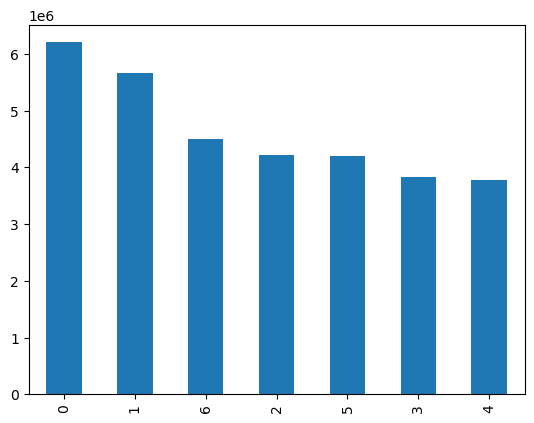

In [6]:
# creating  bar charts
df_ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

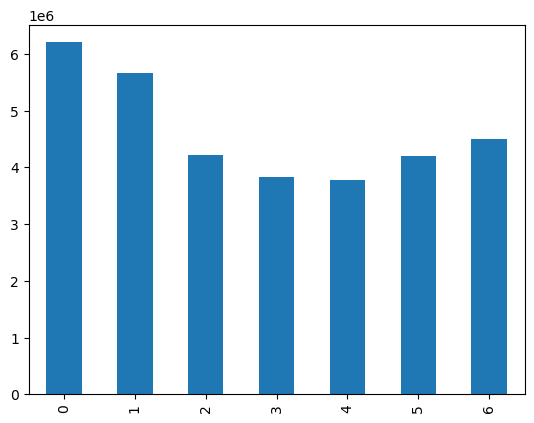

In [7]:
#sorting by dow (index)
barchart_order_dow = df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

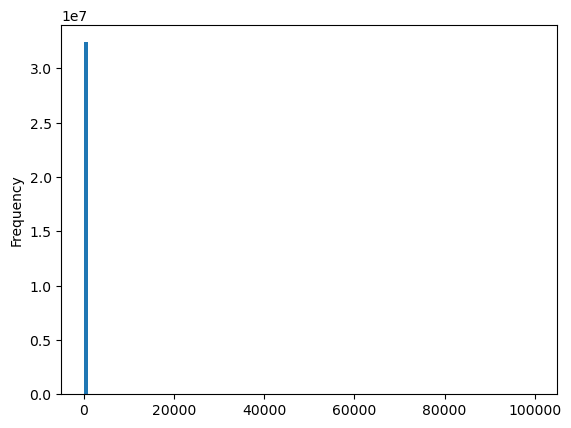

In [8]:
#creating histogram for prices
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [9]:
# fixing problem with the outliers
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [10]:
# checking the max price 
df_ords_prods_cust['prices'].max()

25.0

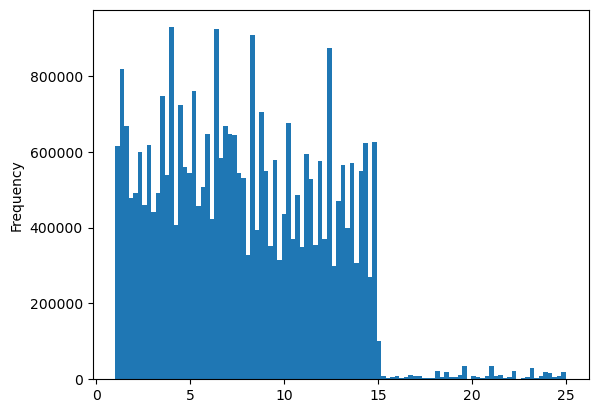

In [11]:
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

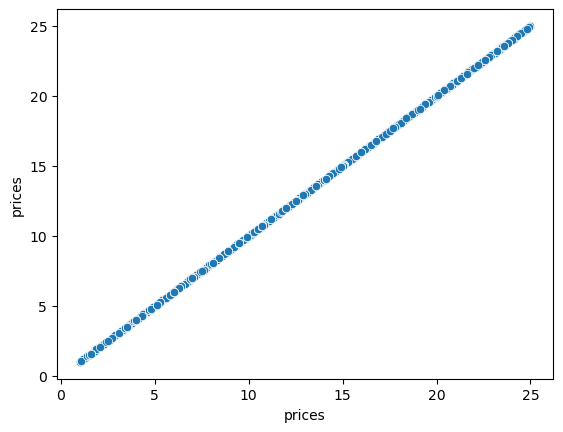

In [12]:
# creating scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

# Sampling Data

In [13]:
# creating new list holding true/ false values to test np.random.rand() <= 0.8 called dev
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.8

In [14]:
# checking if tnew list was created
dev

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
# separating data by creating big and small samples 
big_sample = df_ords_prods_cust[dev]

In [16]:
small_sample = df_ords_prods_cust[~dev]

In [17]:
#checking amount of rows of the list
len(dev)

32404859

In [18]:
# checking if the sum of both creates same length
len(big_sample) + len(small_sample)

32404859

In [21]:
# creating a subset data frame for our line chart
df_small = small_sample[['orders_day_of_week','prices']]

In [22]:
#checking if the data frame was created
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480775 entries, 3 to 32404855
Data columns (total 2 columns):
 #   Column              Dtype  
---  ------              -----  
 0   orders_day_of_week  int64  
 1   prices              float64
dtypes: float64(1), int64(1)
memory usage: 148.3 MB


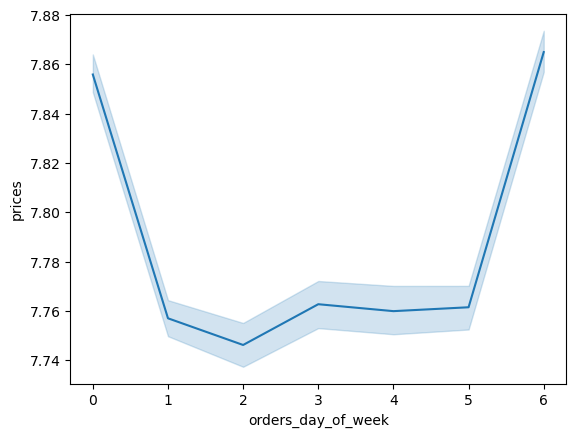

In [23]:
# creating a line chart
line_chart_dow_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

# 3) you need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

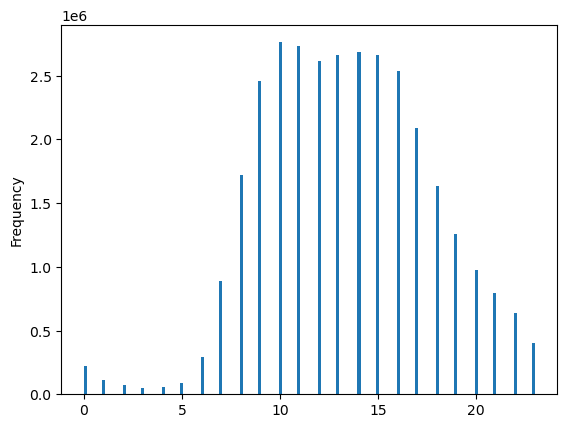

In [24]:
hist_order_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 150)

# 4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

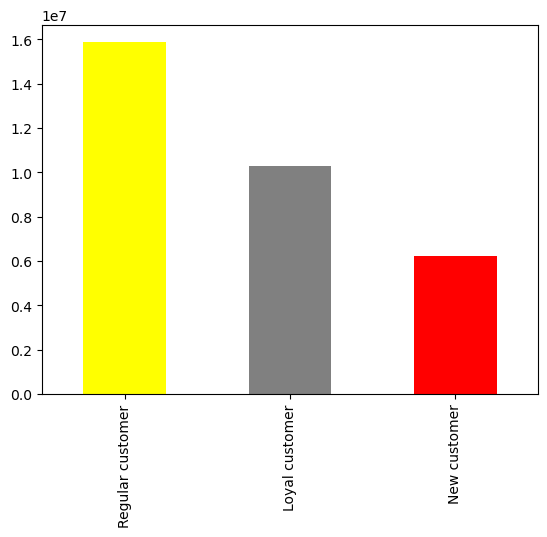

In [26]:
#creating a bar chart
barchart_customer_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['yellow', 'grey', 'red'])

# 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [27]:
# creating a line chart. For this first we need a subset df
df_order_hour_of_day_prices = small_sample[['order_hour_of_day','prices']]

In [28]:
#checking if df was created
df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480775 entries, 3 to 32404855
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 148.3 MB


In [29]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
3,7,9.0
7,14,9.0
9,8,9.0
10,8,12.5
21,8,4.7


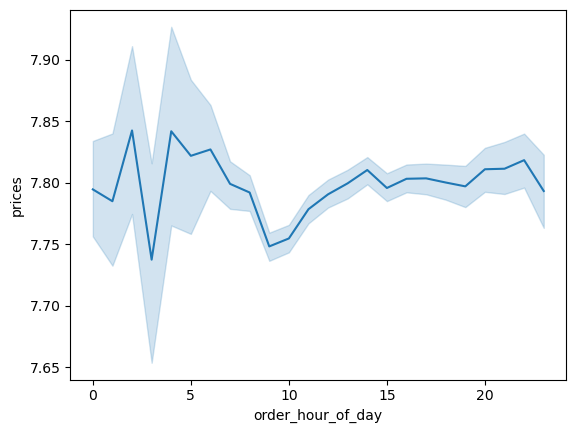

In [30]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

# 6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

In [32]:
#creating subset for the line chart 
df_age_dependants = small_sample[['age','number_dependants']]

In [33]:
# displaying basic statistics
df_age_dependants.head()

,age,number_dependants
3,31,3
7,31,3
9,31,3
10,31,3
21,31,3


In [34]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480775 entries, 3 to 32404855
Data columns (total 2 columns):
 #   Column             Dtype
---  ------             -----
 0   age                int64
 1   number_dependants  int64
dtypes: int64(2)
memory usage: 148.3 MB


In [35]:
df_age_dependants.describe()

,age,number_dependants
count,6.480775e+06,6.480775e+06
mean,4.946768e+01,1.501950e+00
std,1.848418e+01,1.118703e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


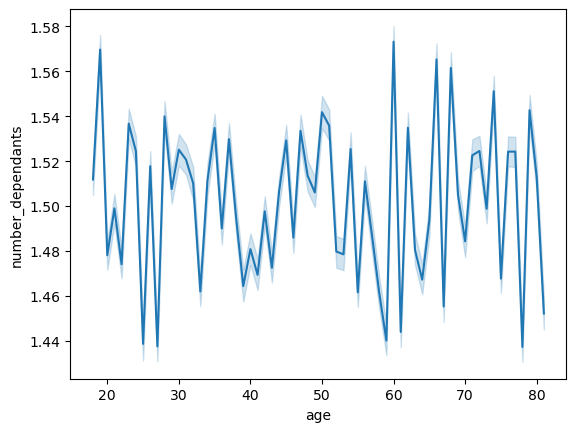

In [36]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

 line chart above shows amount of dependants based on age. 

# 7) You’ll also need to explore whether there’s a connection between age and spending power (income).

In [37]:
# defining df subset for scatterplot
df_age_income = small_sample[['age','income']]

In [38]:
# checking if the df was created
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480775 entries, 3 to 32404855
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 148.3 MB


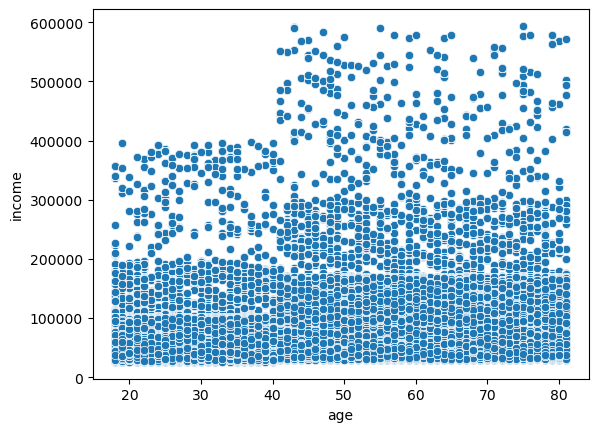

In [39]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

In [ ]:
# The scatter plot above shows age on the x-axis and income on the y-axis. we can see that the higher the age, the higher the age the higher the income, which makes this group of customers more spenders than compared to age <40.

#  Export your visualizations as “.png” files in your relevant project folder

In [40]:
# Exporting .png
barchart_order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_order_dow04.01.png'))

In [41]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices04.01.png'))

In [42]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices04.01.png'))

In [43]:
line_chart_dow_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_dow_prices04.01.png'))

In [44]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day04.01.png'))

In [45]:
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_customer_loyalty04.01.png'))

In [46]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices04.01.png'))

In [47]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants04.01.png'))

In [48]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income04.01.png'))